In [1]:
# Download cached database. This DB includes the download count of top-1000 models.
!git clone https://gist.github.com/b7f8dfba8cf9b268e544efa01c4ff3c1.git || true
!cd b7f8dfba8cf9b268e544efa01c4ff3c1; git pull; cd ..

# Peek the database.
import json
with open("b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json", "r") as filep:
    data = json.load(filep)

for key, val in data.items():
    print(key) # Date
    for model_n_download in val[:5]: # A list of model and download count in the past 30 days
        print("\t" + str(model_n_download))

fatal: destination path 'b7f8dfba8cf9b268e544efa01c4ff3c1' already exists and is not an empty directory.
Already up to date.
09-14-22
	{'model_id': 'bert-base-uncased', 'download': 31330425}
	{'model_id': 'Jean-Baptiste/camembert-ner', 'download': 20521361}
	{'model_id': 'xlm-roberta-base', 'download': 11532709}
	{'model_id': 'gpt2', 'download': 11245868}
	{'model_id': 'roberta-base', 'download': 9520534}
09-19-22
	{'model_id': 'bert-base-uncased', 'download': 32620370}
	{'model_id': 'Jean-Baptiste/camembert-ner', 'download': 20856741}
	{'model_id': 'xlm-roberta-base', 'download': 15844728}
	{'model_id': 'openai/clip-vit-large-patch14', 'download': 10148556}
	{'model_id': 'gpt2', 'download': 9767657}
09-26-22
	{'model_id': 'bert-base-uncased', 'download': 33945651}
	{'model_id': 'xlm-roberta-base', 'download': 22022328}
	{'model_id': 'Jean-Baptiste/camembert-ner', 'download': 19275967}
	{'model_id': 'openai/clip-vit-large-patch14', 'download': 11546382}
	{'model_id': 'roberta-base', 'd

In [2]:
# Query download counts for a specific model
!python -m hf_hub_stats query_download --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--model-ids bert-base-uncased gpt2

5 records loaded from the download trend DB
ModelNDownload(model_id='bert-base-uncased', download=26372475)
ModelNDownload(model_id='gpt2', download=11239652)


In [3]:
# Query download counts for a specific model on a specific time frame
!python -m hf_hub_stats query_download --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--model-ids bert-base-uncased gpt2 --date "09-14-22"

5 records loaded from the download trend DB
ModelNDownload(model_id='bert-base-uncased', download=31330425)
ModelNDownload(model_id='gpt2', download=11245868)


In [4]:
# Download cached database. This DB includes the size of top-1000 models.
!git clone https://gist.github.com/d6d037ce3189e3ecd63eb99f1c4d53a2.git || true
!cd d6d037ce3189e3ecd63eb99f1c4d53a2; git pull; cd ..

# Update the database.
!python -m hf_hub_stats update_size_db --size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json --end 1000

fatal: destination path 'd6d037ce3189e3ecd63eb99f1c4d53a2' already exists and is not an empty directory.
Already up to date.
2283 record loaded from the model size DB
Using cached model list (queried in 0 days)


In [5]:
# Query size for a specific model
!python -m hf_hub_stats query_size --size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json \
--model-ids bert-base-uncased gpt2 flair/chunk-english LTP/small

2283 record loaded from the model size DB
CalcModelSizeResult(model_id='bert-base-uncased', size=0.10948224, code=0, memo=None)
CalcModelSizeResult(model_id='gpt2', size=0.124439808, code=0, memo=None)
CalcModelSizeResult(model_id='flair/chunk-english', size=0, code=1, memo="flair/chunk-english does not appear to have a file named config.json. Checkout 'https://huggingface.co/flair/chunk-english/main' for available files.")
CalcModelSizeResult(model_id='LTP/small', size=0, code=1, memo='Unrecognized model in LTP/small. Should have a `model_type` key in its config.json, or contain one of the following strings in its name: albert, bart, beit, bert, bert-generation, big_bird, bigbird_pegasus, blenderbot, blenderbot-small, bloom, camembert, canine, clip, codegen, convbert, convnext, ctrl, cvt, data2vec-audio, data2vec-text, data2vec-vision, deberta, deberta-v2, decision_transformer, deit, detr, distilbert, donut-swin, dpr, dpt, electra, encoder-decoder, flaubert, flava, fnet, fsmt, funnel,

In [6]:
# Query top-20 most downloaded models
!python -m hf_hub_stats query_top --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json --limit 20

2283 record loaded from the model size DB
5 records loaded from the download trend DB
Appended xlm-roberta-base: 0B params, now 1 models, target 20 models
Appended bert-base-uncased: 0B params, now 2 models, target 20 models
Appended Jean-Baptiste/camembert-ner: 0B params, now 3 models, target 20 models
Appended roberta-base: 0B params, now 4 models, target 20 models
Appended openai/clip-vit-large-patch14: 0B params, now 5 models, target 20 models
Appended gpt2: 0B params, now 6 models, target 20 models
Appended bert-base-cased: 0B params, now 7 models, target 20 models
Appended distilbert-base-uncased: 0B params, now 8 models, target 20 models
Appended roberta-large: 0B params, now 9 models, target 20 models
Appended bert-base-chinese: 0B params, now 10 models, target 20 models
Appended sentence-transformers/all-MiniLM-L6-v2: 0B params, now 11 models, target 20 models
Appended deepset/roberta-base-squad2: 0B params, now 12 models, target 20 models
Appended microsoft/deberta-base: 0B p

In [7]:
# Query top-20 most downloaded models with size
!python -m hf_hub_stats query_top --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json --limit 20 --max-size 100

2283 record loaded from the model size DB
5 records loaded from the download trend DB
Appended xlm-roberta-base: 0.278043648B params, now 1 models, target 20 models
Appended bert-base-uncased: 0.10948224B params, now 2 models, target 20 models
Appended Jean-Baptiste/camembert-ner: 0.110621952B params, now 3 models, target 20 models
Appended roberta-base: 0.124645632B params, now 4 models, target 20 models
Appended openai/clip-vit-large-patch14: 0.427616513B params, now 5 models, target 20 models
Appended gpt2: 0.124439808B params, now 6 models, target 20 models
Appended bert-base-cased: 0.108310272B params, now 7 models, target 20 models
Appended distilbert-base-uncased: 0.06636288B params, now 8 models, target 20 models
Appended roberta-large: 0.355359744B params, now 9 models, target 20 models
Appended bert-base-chinese: 0.102267648B params, now 10 models, target 20 models
Appended sentence-transformers/all-MiniLM-L6-v2: 0.022713216B params, now 11 models, target 20 models
Appended d

In [8]:
# Query top-20 most downloaded models with size 1-10B
!python -m hf_hub_stats query_top --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--limit 20 --size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json --min-size 1 --max-size 10

2283 record loaded from the model size DB
5 records loaded from the download trend DB
Appended EleutherAI/gpt-neo-1.3B: 1.315575808B params, now 1 models, target 20 models
Appended EleutherAI/gpt-j-6B: 5.844393984B params, now 2 models, target 20 models
Appended EleutherAI/gpt-neo-2.7B: 2.65130752B params, now 3 models, target 20 models
Appended gpt2-xl: 1.5576112B params, now 4 models, target 20 models
Appended facebook/m2m100_1.2B: 1.23947008B params, now 5 models, target 20 models
Appended bigscience/T0_3B: 2.78395904B params, now 6 models, target 20 models
Appended opentensor/bt-opt-1.3b: 1.315743744B params, now 7 models, target 20 models
Appended t5-3b: 2.851598336B params, now 8 models, target 20 models
Appended sberbank-ai/mGPT: 1.417596928B params, now 9 models, target 20 models
Appended facebook/opt-1.3b: 1.31575808B params, now 10 models, target 20 models
Appended facebook/opt-2.7b: 2.6515968B params, now 11 models, target 20 models
Appended facebook/nllb-200-3.3B: 3.3448632

In [9]:
# Query top-20 most downloaded models with size 1-10B, including transformers unsupported models
!python -m hf_hub_stats query_top --download-db b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json \
--limit 20 --size-db d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json \
--min-size 1 --max-size 10 --include-unsupported

2283 record loaded from the model size DB
5 records loaded from the download trend DB
Appended EleutherAI/gpt-neo-1.3B: 1.315575808B params, now 1 models, target 20 models
Appended EleutherAI/gpt-j-6B: 5.844393984B params, now 2 models, target 20 models
Appended flair/pos-english-fast: 0B params, now 3 models, target 21 models
Appended pyannote/segmentation: 0B params, now 4 models, target 22 models
Appended imone/pangu_2_6B: 0B params, now 5 models, target 23 models
Appended flair/ner-english-large: 0B params, now 6 models, target 24 models
Appended EleutherAI/gpt-neo-2.7B: 2.65130752B params, now 7 models, target 24 models
Appended pyannote/embedding: 0B params, now 8 models, target 25 models
Appended flair/ner-german: 0B params, now 9 models, target 26 models
Appended gpt2-xl: 1.5576112B params, now 10 models, target 26 models
Appended kykim/bertshared-kor-base: 0B params, now 11 models, target 27 models
Appended LTP/small: 0B params, now 12 models, target 28 models
Appended faceboo

In [10]:
%matplotlib inline
import argparse
from hf_hub_stats.query_db import draw_download_trend

Namespace(download_db='b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json', limit=20, max_history=0, max_size=inf, min_size=0, output=None, size_db='d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json')
2283 record loaded from the model size DB
5 records loaded from the download trend DB


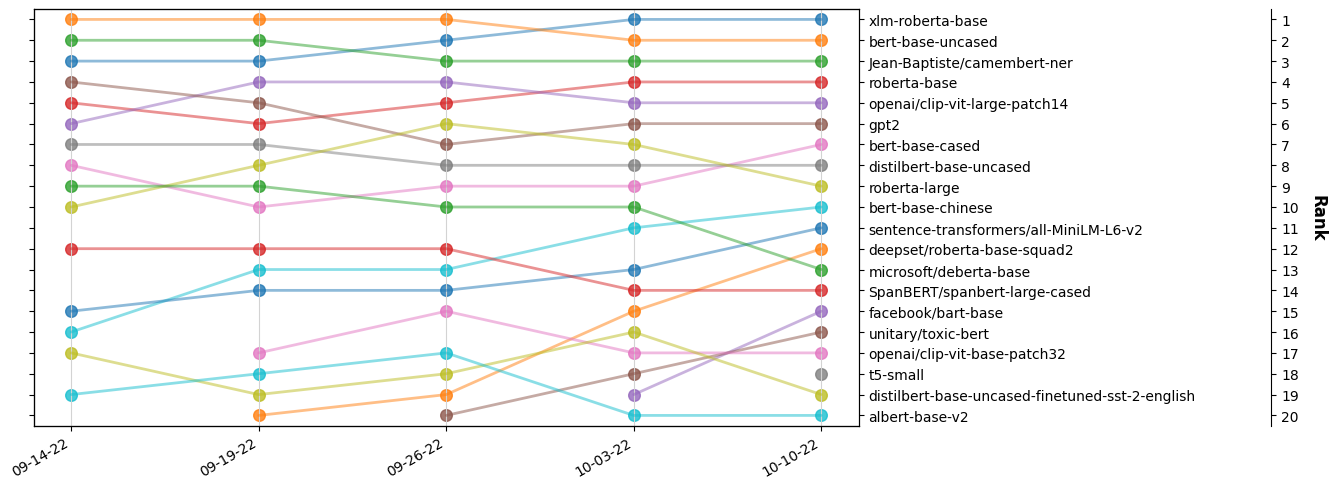

In [11]:
# Draw the download trend for the top-20 models.
args = argparse.Namespace()
args.size_db = "d6d037ce3189e3ecd63eb99f1c4d53a2/hf_hub_model_size_db.json"
args.download_db = "b7f8dfba8cf9b268e544efa01c4ff3c1/hf_hub_download_trend_db.json"
args.limit = 20
args.min_size = 0
args.max_size = float("inf")
args.max_history = 0
args.output = None
print(args)
draw_download_trend(args)

2283 record loaded from the model size DB
5 records loaded from the download trend DB


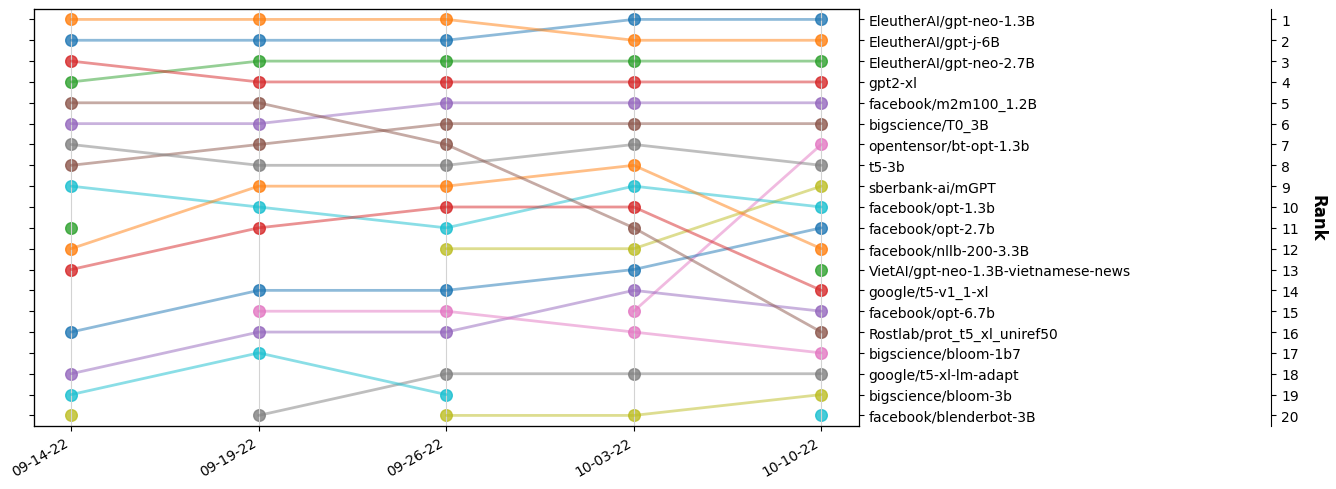

In [12]:
# Draw the download trend for the top-20 models with 1-10B.
args.min_size = 1
args.max_size = 10
draw_download_trend(args)